# Exploratory Data Analysis(EDA) on Haberman's Survival Data Set
Survival of patients who had undergone surgery for breast cancer

**Dataset:** https://www.kaggle.com/gilsousa/habermans-survival-data-set

**Description:** The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**Attribute Information:**
- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

**Number of data points:** 306

**Number of Attributes:** 4 (including the class attribute)

**Import Packages**

In [45]:
import os
import numpy as np 
import pandas as pd 
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
sns.set()
style.use("ggplot")
sns.set_style("whitegrid")

**Data Loading**

In [59]:
data = pd.read_csv(r"C:\Users\Triloki-Gupta\Downloads\haberman.csv",names=['age', 'year_of_operation', 'positive_axillary_nodes', 'survival_status'])

In [60]:
# Name of columns
data.columns

Index(['age', 'year_of_operation', 'positive_axillary_nodes',
       'survival_status'],
      dtype='object')

In [61]:
#Number of data point & features
data.shape

(306, 4)

In [62]:
# modify the target column values to be meaningful as well as categorical
data['survival_status'] = data['survival_status'].map({1:"survived", 2:"died"})
data['survival_status'] = data['survival_status'].astype('category')

In [63]:
#Number of data point for each class
data["survival_status"].value_counts()

survived    225
died         81
Name: survival_status, dtype: int64

In [64]:
#Data point in Percentage
data["survival_status"].value_counts(normalize=True)

survived    0.735294
died        0.264706
Name: survival_status, dtype: float64

In [32]:
#Top five data point of dataset
data.head()

,age,year_of_operation,positive_axillary_nodes,survival_status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [33]:
#Discription of dataset
data.describe()

,age,year_of_operation,positive_axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [34]:
#Information about dataset
#Checking is there null value in column or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                        306 non-null int64
year_of_operation          306 non-null int64
positive_axillary_nodes    306 non-null int64
survival_status            306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


**Observations**

 - There are 4 columns and 306 records.
 - There are no missing values.
 - Age of the patient lies between 30 to 83, with mean be 52.457 and median is 52
 - Total 225 people survived which makes total of 73% of total patients.

As there are **no missing** values in dataset, **data imputation** process will not be required. 

# Obective Of Exploratory Analysis

To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

# Univariate Analysis

**Histogram**

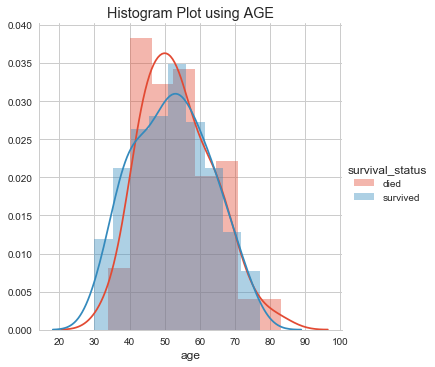

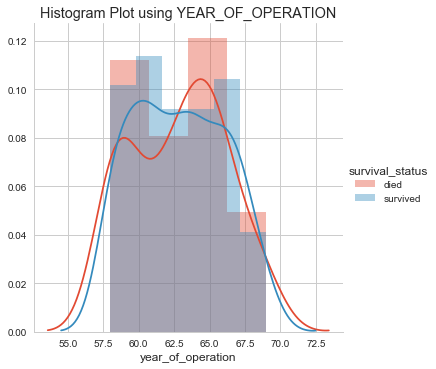

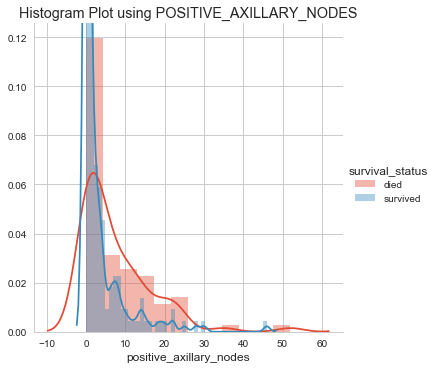

In [36]:
#histograms
for idx,features in enumerate(data.columns[:-1]):
    sns.FacetGrid(data,hue = 'survival_status',size = 5).map(sns.distplot,features).add_legend()
    plt.title("Histogram Plot using "+ features.upper())
    plt.show()

**Obervations : Histogram plot using Age**
- The distributions are highly mixed up so nothing can be obtained.
- But from the graph we can say that the patients who have age less than 40 survived for more then 5 years after operation.

**Obervations : Histogram plot using year_of_operation**
- The distributions are highly mixed up so nothing can be obtained.
- But from the graph we can say that the patients who got operated between the years 58 to 62.5 survived for more then 5 years after operation.

In [39]:
print(data['positive_axillary_nodes'].mean())

4.026143790849673


**Observation : Histogram plot using positive_axillary_nodes**
- The distribution is right skewed and mass of distribution is centered on left of the figure.
- The mean is centered at 4.036 and the patients who have axil nodes less than mean lived more the 5 years after operation.

** Probability Density Function(PDF) & Cummulative Density Function(CDF)**

********************  AGE  ********************
Probability Density of People Survived [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Probability Density of People Died  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Cummulative Density of People Survived   [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
Cummulative Density of People Died   [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
********************  YEAR_OF_OPERATION  ********************
Probability Density of People Survived [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Probability Density of People Died  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938

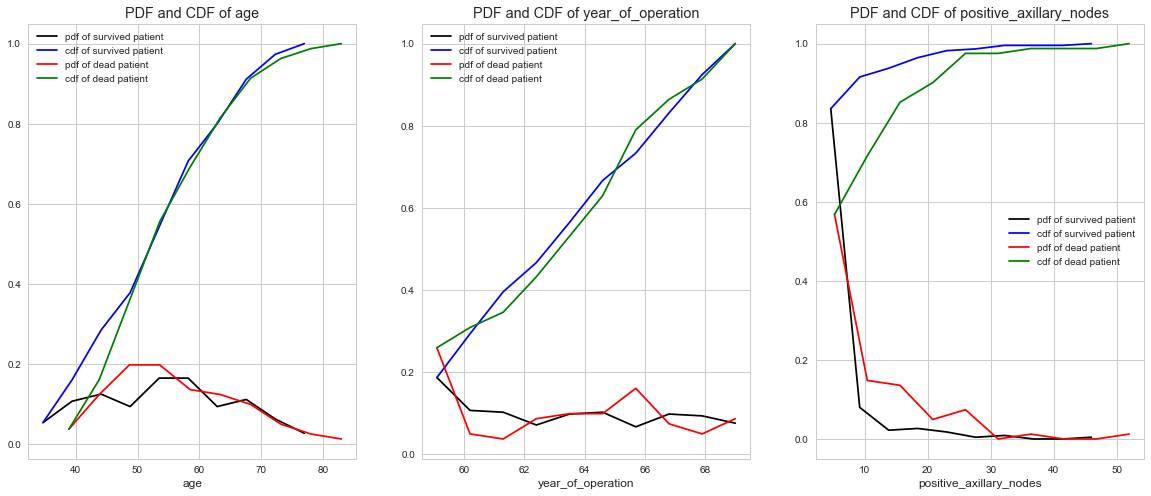

In [48]:
#Probability Density Function and Cummulative Density Functioon
plt.figure(figsize = (20,8))
for idx,features in enumerate(data.columns[:-1]):
    plt.subplot(1,3,idx+1)
    
    #Survived People Probability Distribution 
    counts_survived,bins_edges_survived = np.histogram(data[features][data['survival_status'] == 'survived'],bins = 10, density = True)
    pdf_survived = counts_survived/sum(counts_survived)
    cdf_survived = np.cumsum(pdf_survived)
    
    #Died People Probability Distribution 
    counts_died, bins_edges_died = np.histogram(data[features][data['survival_status'] == 'died'], bins = 10, density = True)
    pdf_died = counts_died/sum(counts_died)
    cdf_died = np.cumsum(pdf_died)
    
    print(Fore.GREEN + "*"*20 + Style.RESET_ALL + "  "+features.upper()+"  "+Fore.GREEN + "*"*20 + Style.RESET_ALL)
    print (Fore.RED +"Probability Density of People Survived"+Style.RESET_ALL, pdf_survived)
    print (Fore.RED + 'Probability Density of People Died '+ Style.RESET_ALL , pdf_died)
    print (Fore.RED + 'Cummulative Density of People Survived  '+ Style.RESET_ALL, cdf_survived)
    print (Fore.RED + 'Cummulative Density of People Died  '+ Style.RESET_ALL, cdf_died)
    
    #Graph Plotting.
    plt.title("PDF and CDF of "+features)
    plt.plot(bins_edges_survived[1:],pdf_survived, color = 'black',label = 'pdf of survived patient')
    plt.plot(bins_edges_survived[1:],cdf_survived, color = 'blue',label = 'cdf of survived patient')
    plt.plot(bins_edges_died[1:],pdf_died, color = 'red', label = 'pdf of dead patient')
    plt.plot(bins_edges_died[1:],cdf_died, color = 'green', label = 'cdf of dead patient')
    plt.xlabel(features)
    plt.legend()
plt.show()

**Observation : PDF and CDF of age**
- Age less than 38 are definitely survived for more than 5 years after operation.

**Observation : PDF and CDF of year_of_operation**
- Those who performed operation between year 61 - 65 are more probable to be survived 5 years or longer .

**Observation : PDF and CDF of positive_axillary_node**
- Those who have axil_nodes less than 22 are more probable to be survived 5 years or longer .

## Mean

In [49]:
# Dividing data on the basis of classes

survived = data.loc[data["survival_status"] == "survived"];
died = data.loc[data["survival_status"] == "died"];

In [52]:
#Mean & Std-deviation of age

print("Means:")
print(np.mean(survived["age"]))
print(np.mean(died["age"]))

print("\nStd-dev:");
print(np.std(survived["age"]))
print(np.std(died["age"]))

Means:
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


**Observation :**
- The mean age of patients who Survived 5 years or longer is approximately 52 years.
- The mean age of patients who Died within 5 years of operation is approximately 54 years.

In [55]:
#Mean & Std-deviation of positive_axillary_node
print("Means:")
print(np.mean(survived["positive_axillary_nodes"]))
print(np.mean(died["positive_axillary_nodes"]))

print("\nStd-dev:");
print(np.std(survived["positive_axillary_nodes"]))
print(np.std(died["positive_axillary_nodes"]))

Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


**Observation :**
- The mean of axil_nodes of patients who Survived 5 years or longer is approximately 3.
- The mean of axil_nodes of patients who Died within 5 years of operation is approximately 7.

## Box plot & Whiskers

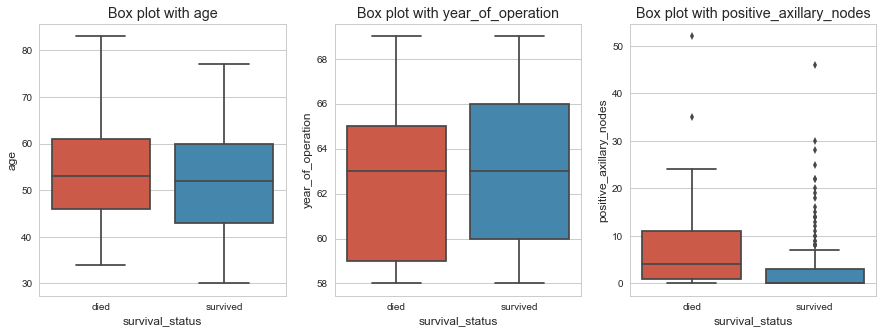

In [68]:
#Box plot with wishkers
fig,axes = plt.subplots(1,3,figsize = (15,5))
for idx, features in enumerate(data.columns[:-1]):
    sns.boxplot(x = 'survival_status', y = features, data = data, ax = axes[idx]).set_title("Box plot with "+features)
plt.show()

**Observation : Box plot with age**
- The patients having age less than 34 years definitely Survived 5 years or longer.
- The patients having age greater than 78 definitely Died within 5 years of operation.

**Observation : Box plot with age**
- The patients having positive_axilary_nodes greater than 0.4 definitely died

## Violin plots

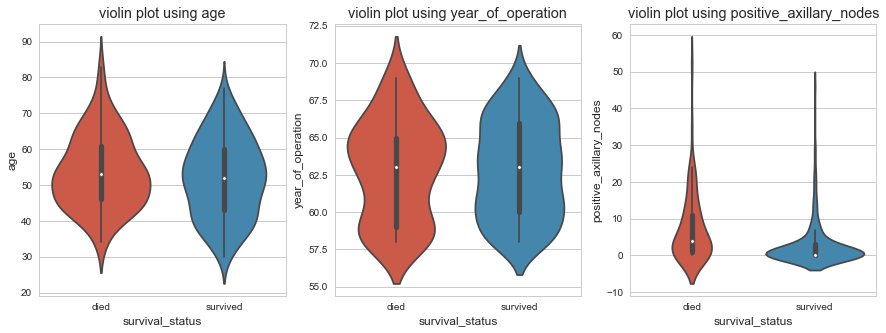

In [69]:
#Violin Plot
fig,axes = plt.subplots(1,3,figsize = (15,5))
for idx, features in enumerate(data.columns[:-1]):
    sns.violinplot(x = 'survival_status', y = features, data = data, ax = axes[idx]).set_title("violin plot using " +features)

plt.show()

## 2-D Scatter Plot & Pair Plot

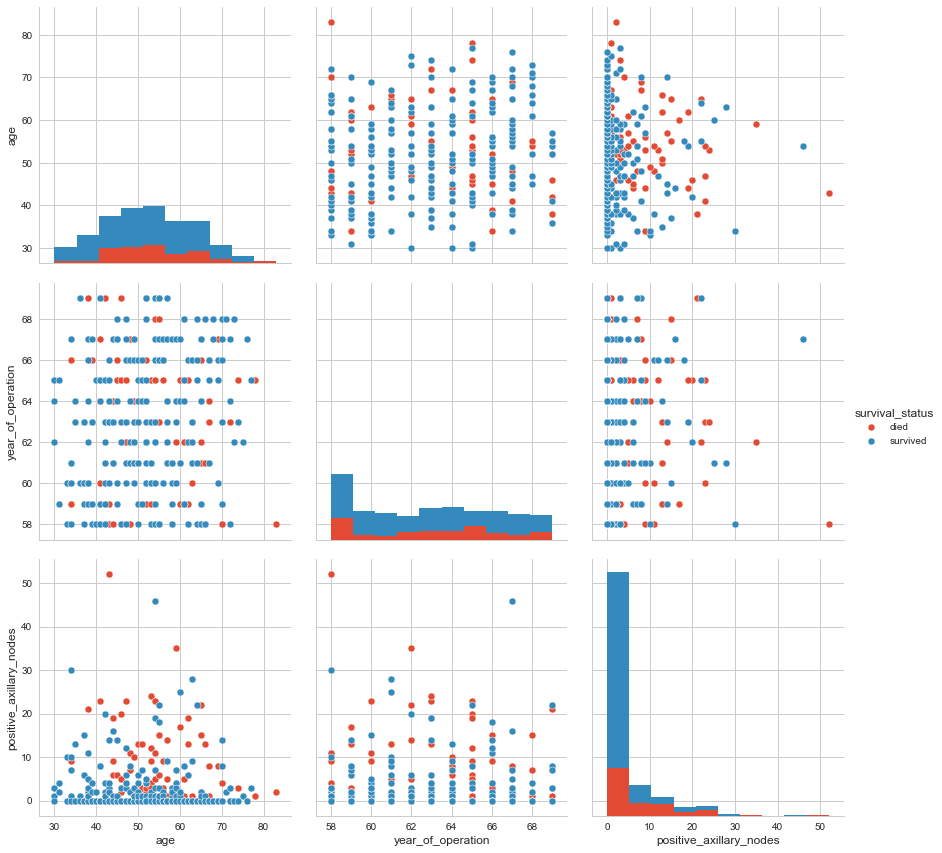

In [71]:
#Pair Plot
sns.pairplot(data,hue = "survival_status", size = 4)
plt.show()

**Observation**
- Using Pair Plot we can classify that patient of age less than 40 has survived as can be seen from pair plotting between AGE and YEAR. There are more number of blue dots for age <= 40.
- Rest plots are not much useful for classification.

## Contour Graph

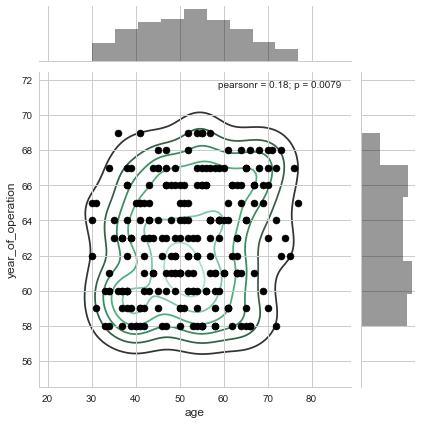

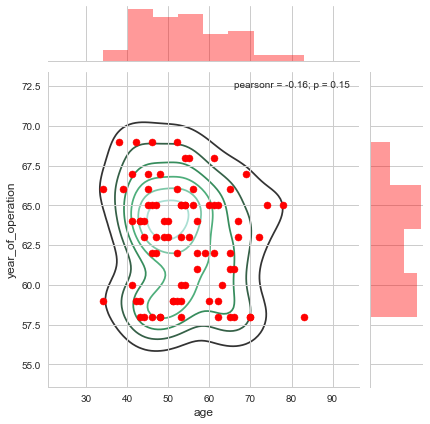

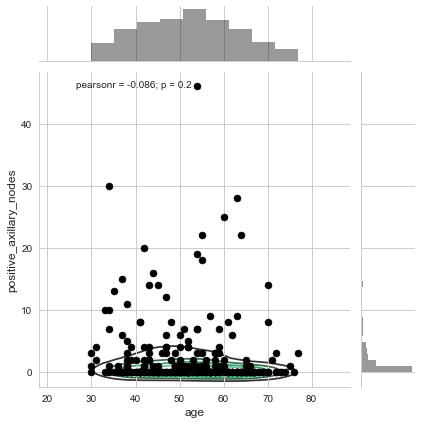

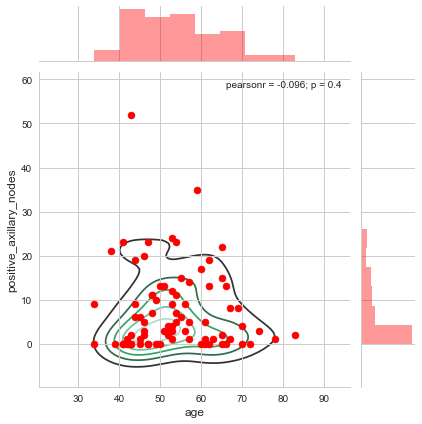

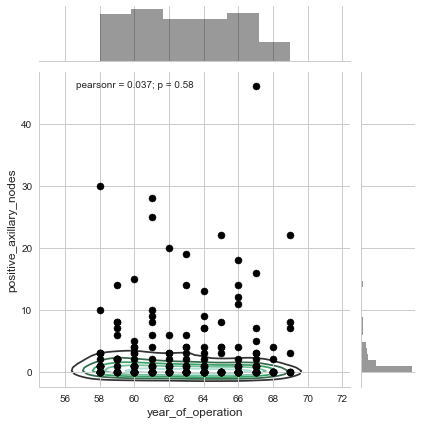

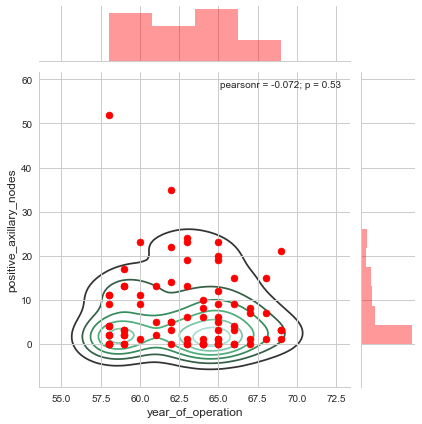

In [75]:
#Graph with scatter plot then applying density estimate (contour graph) 
#Seperate Contour for died and survived to better visulize both the status.
g = (sns.jointplot("age", "year_of_operation",data=data[data['survival_status'] == 'survived'], color="black").plot_joint(sns.kdeplot, zorder=0, n_levels=6))
g = (sns.jointplot("age", "year_of_operation",data=data[data['survival_status'] == 'died'], color="red").plot_joint(sns.kdeplot, zorder=0, n_levels=6))
plt.show()

g = (sns.jointplot("age", "positive_axillary_nodes", data = data[data['survival_status']== 'survived'], color = "black").plot_joint (sns.kdeplot, zorder = 0, n_levels = 6))
g = (sns.jointplot("age", "positive_axillary_nodes", data = data[data['survival_status']== 'died'], color = "red").plot_joint (sns.kdeplot, zorder = 0, n_levels = 6))
plt.show()

g = (sns.jointplot("year_of_operation", "positive_axillary_nodes", data = data[data['survival_status']== 'survived'], color = "black").plot_joint (sns.kdeplot, zorder = 0, n_levels = 6))
g = (sns.jointplot("year_of_operation", "positive_axillary_nodes", data = data[data['survival_status']== 'died'], color = "red").plot_joint (sns.kdeplot, zorder = 0, n_levels = 6))
plt.show()


**Observation:**
- From Contour Graph it could be observe that most of the people who gone through the surgery where between of age 45-55 in year 1959-1964.